In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [2]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Dataset

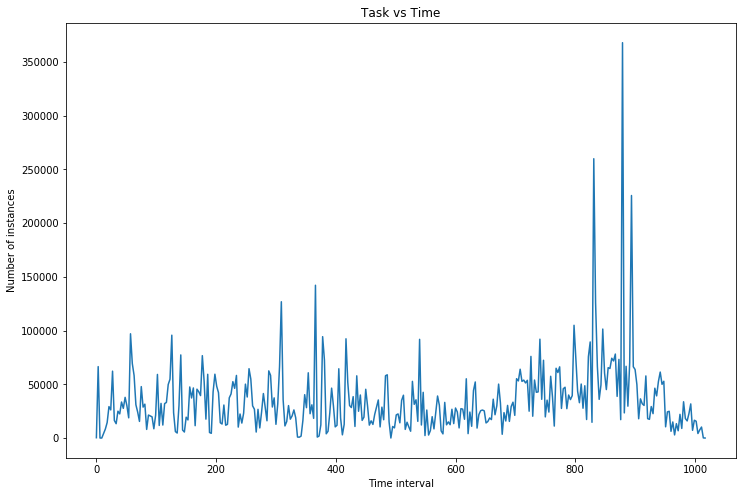

In [3]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Stationarity Check

In [4]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
#Perform Dickey-Fuller test to test data stationarity
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test')
dftest=adfuller(df2.no_of_instances, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
print(dfoutput)

Results of Dickey-Fuller test
Test Statistic                  -4.600803
p-value                          0.000129
#Lags Used                       4.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


In Dickey-Fuller test the critical value should be more than the test statistics. p-value should be very small. Our result satisfies it. So our data is Stationary

# ARIMA Model

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

                             ARIMA Model Results                              
Dep. Variable:      D.no_of_instances   No. Observations:                  339
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4051.026
Method:                       css-mle   S.D. of innovations          37441.832
Date:                Tue, 04 Dec 2018   AIC                           8108.052
Time:                        17:10:30   BIC                           8119.530
Sample:                             1   HQIC                          8112.626
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8820   1347.008     -0.001      0.999   -2640.970    2639.206
ar.L1.D.no_of_instances    -0.5112      0.047    -10.941      0.000      -0.603      -0.420


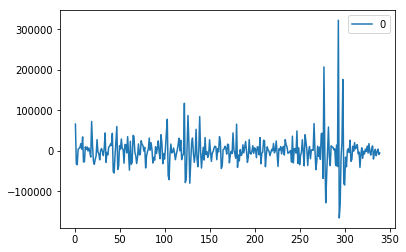

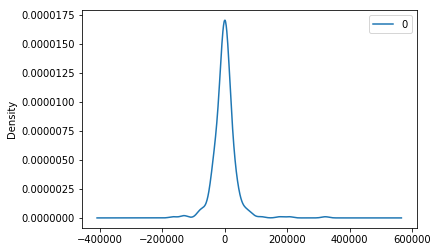

                   0
count     339.000000
mean        0.184165
std     37542.271050
min   -165140.409954
25%    -13256.379283
50%      -830.619428
75%     11456.339078
max    322078.908994


In [5]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# fit model
model = ARIMA(df2.no_of_instances, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Sliding Window ARIMA (window size=20)

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

Time, predicted, expected 
 60 47187 69360.0
Time, predicted, expected 
 63 84219 58208.0
Time, predicted, expected 
 66 67489 30980.0
Time, predicted, expected 
 69 43542 24095.0
Time, predicted, expected 
 72 27668 15465.0
Time, predicted, expected 
 75 18665 47854.0
Time, predicted, expected 
 78 38287 28770.0
Time, predicted, expected 
 81 36053 31513.0
Time, predicted, expected 
 84 30086 8024.0
Time, predicted, expected 
 87 12566 21380.0
Time, predicted, expected 
 90 17080 20513.0
Time, predicted, expected 
 93 21143 19727.0
Time, predicted, expected 
 96 19621 8616.0
Time, predicted, expected 
 99 11341 21318.0
Time, predicted, expected 
 102 16011 59174.0
Time, predicted, expected 
 105 49977 11699.0
Time, predicted, expected 
 108 29126 32231.0
Time, predicted, expected 
 111 23950 12084.0
Time, predicted, expected 
 114 21831 32034.0
Time, predicted, expected 
 117 17457 33136.0
Time, predicted, expected 
 120 29975 49765.0
Time, predicted, expected 
 123 40353 54757.0
Time

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: divide by zero encountered in true_divide
  invarcoefs = -np.log((1-params)/(1+params))
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\priya\Anaconda3\envs\PythonForCl

Time, predicted, expected 
 372 1846 1846.0
Time, predicted, expected 
 375 603 12247.0
Time, predicted, expected 
 378 5822 94325.0
Time, predicted, expected 
 381 58454 72507.0
Time, predicted, expected 
 384 87273 3943.0
Time, predicted, expected 
 387 32472 6292.0
Time, predicted, expected 
 390 3947 23554.0
Time, predicted, expected 
 393 17231 46424.0
Time, predicted, expected 
 396 40818 30066.0
Time, predicted, expected 
 399 38440 10397.0
Time, predicted, expected 
 402 18370 11868.0
Time, predicted, expected 
 405 10261 64454.0
Time, predicted, expected 
 408 46511 18594.0
Time, predicted, expected 
 411 35261 2969.0
Time, predicted, expected 
 414 5536 12733.0
Time, predicted, expected 
 417 8538 92343.0
Time, predicted, expected 
 420 68905 51790.0
Time, predicted, expected 
 423 70125 30244.0
Time, predicted, expected 
 426 26334 28365.0
Time, predicted, expected 
 429 30113 38503.0
Time, predicted, expected 
 432 39680 10776.0
Time, predicted, expected 
 435 14781 57886.0

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 834 125832 125832.0
Time, predicted, expected 
 837 233345 66533.0
Time, predicted, expected 
 840 97388 35993.0
Time, predicted, expected 
 843 50425 49375.0
Time, predicted, expected 
 846 45184 101400.0
Time, predicted, expected 
 849 83076 60457.0
Time, predicted, expected 
 852 80977 45092.0
Time, predicted, expected 
 855 51024 65475.0
Time, predicted, expected 
 858 53657 64705.0
Time, predicted, expected 
 861 64793 74241.0
Time, predicted, expected 
 864 72298 71728.0
Time, predicted, expected 
 867 75817 78135.0
Time, predicted, expected 
 870 77394 38759.0
Time, predicted, expected 
 873 57155 73167.0
Time, predicted, expected 
 876 59549 17094.0
Time, predicted, expected 
 879 42560 367838.0
Time, predicted, expected 
 882 176381 23384.0
Time, predicted, expected 
 885 309248 66751.0
Time, predicted, expected 
 888 34141 29636.0
Time, predicted, expected 
 891 35910 70221.0
Time, predicted, expected 
 894 41210 225655.0
Time, predicted, expected 

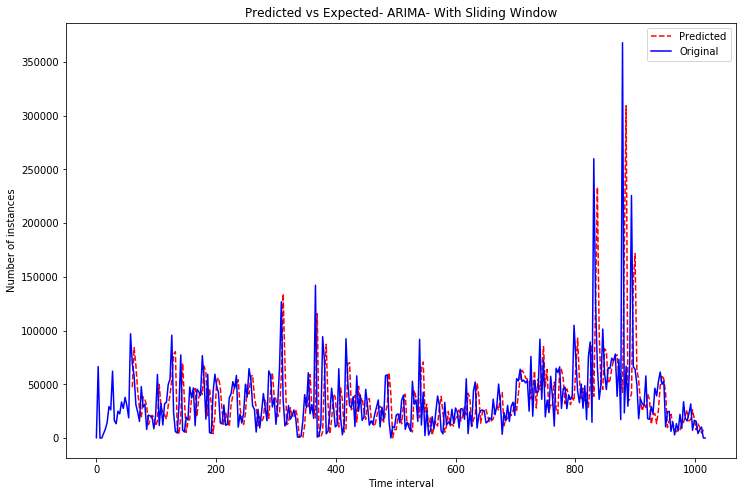

In [6]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Computational Time
import time
time_start = time.clock()
 
X = df2.no_of_instances
X = X.astype('float32')
window=20
Begin=0
predictions = list()
#predictions = []
times=list()
#times=[]
SE=0
sumAPE=0
#sumMASE=0
for i in range (Begin,((len(X))-window)):
    train=X[i:i+window]
    test=X[i+window]        
    #size = int(len(X) * 0.50)
    #print('Size=',size)
    #train, test = X[50:size], X[size:180]
    #print(len(train))
    #print(len(test))
    history = [x for x in train]
    #print('History \n', history)
    #print('Train \n', train)
    #print('Test \n', test)
    #for t in range(len(test)):
    #SE=0
    #sumAPE=0
    #sumMASE=0
    #for t in range (i+window,i+window+1):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    #print('OUTPUT= \n', output)
    if (math.isnan(output[0])):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat = np.int(output[0])
    if (yhat<0):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat=yhat
    predictions.append(yhat)
    obs = test
    history.append(obs)
    #print('XYZ')
    t=i+window
    tm=df2.time_interval[t]
    times.append(tm)
    #print('time is ====', times)
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, test)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/((len(X))-window))
MAPE=(sumAPE/((len(X))-window))*100
#MASE=(sumMASE/(len(X)-window))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#Evaluation by using Library functions

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

#print('Time= \n', times)
#print('Prediction= \n', predictions)
# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- ARIMA- With Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()



# Sliding Window ARIMA (window size=10)

Time, predicted, expected 
 30 41181 16371.0
Time, predicted, expected 
 33 41219 13337.0
Time, predicted, expected 
 36 16856 24957.0
Time, predicted, expected 
 39 23768 22465.0
Time, predicted, expected 
 42 26330 33509.0
Time, predicted, expected 
 45 32403 27614.0
Time, predicted, expected 
 48 32046 37844.0
Time, predicted, expected 
 51 34365 29999.0
Time, predicted, expected 
 54 33486 18792.0
Time, predicted, expected 
 57 14320 97007.0
Time, predicted, expected 
 60 69360 69360.0
Time, predicted, expected 
 63 96415 58208.0


C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 66 68733 30980.0
Time, predicted, expected 
 69 41476 24095.0
Time, predicted, expected 
 72 24825 15465.0
Time, predicted, expected 
 75 15819 47854.0
Time, predicted, expected 
 78 40138 28770.0
Time, predicted, expected 
 81 35746 31513.0
Time, predicted, expected 
 84 26886 8024.0
Time, predicted, expected 
 87 2390 21380.0
Time, predicted, expected 
 90 8292 20513.0
Time, predicted, expected 
 93 15881 19727.0
Time, predicted, expected 
 96 18553 8616.0
Time, predicted, expected 
 99 13172 21318.0
Time, predicted, expected 
 102 7797 59174.0
Time, predicted, expected 
 105 57983 11699.0
Time, predicted, expected 
 108 40306 32231.0
Time, predicted, expected 
 111 20614 12084.0
Time, predicted, expected 
 114 25055 32034.0
Time, predicted, expected 
 117 20596 33136.0
Time, predicted, expected 
 120 34892 49765.0
Time, predicted, expected 
 123 45268 54757.0
Time, predicted, expected 
 126 59448 95694.0
Time, predicted, expected 
 129 75376 23541.0
Time,

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 372 1846 1846.0
Time, predicted, expected 
 375 12247 12247.0
Time, predicted, expected 
 378 2240 94325.0
Time, predicted, expected 
 381 60613 72507.0
Time, predicted, expected 
 384 87518 3943.0
Time, predicted, expected 
 387 29769 6292.0
Time, predicted, expected 
 390 1730 23554.0
Time, predicted, expected 
 393 7848 46424.0
Time, predicted, expected 
 396 36838 30066.0
Time, predicted, expected 
 399 32872 10397.0
Time, predicted, expected 
 402 10260 11868.0
Time, predicted, expected 
 405 11687 64454.0
Time, predicted, expected 
 408 74996 18594.0
Time, predicted, expected 
 411 30593 2969.0
Time, predicted, expected 
 414 5887 12733.0
Time, predicted, expected 
 417 10942 92343.0
Time, predicted, expected 
 420 90100 51790.0
Time, predicted, expected 
 423 67003 30244.0
Time, predicted, expected 
 426 36396 28365.0
Time, predicted, expected 
 429 31220 38503.0
Time, predicted, expected 
 432 37773 10776.0
Time, predicted, expected 
 435 8218 57886.

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 546 42528 42528.0
Time, predicted, expected 
 549 25541 2308.0
Time, predicted, expected 
 552 33005 26047.0
Time, predicted, expected 
 555 5379 2794.0
Time, predicted, expected 
 558 13708 6917.0
Time, predicted, expected 
 561 19870 19870.0
Time, predicted, expected 
 564 7535 8506.0
Time, predicted, expected 
 567 9898 23612.0
Time, predicted, expected 
 570 886 39105.0
Time, predicted, expected 
 573 29039 30508.0
Time, predicted, expected 
 576 39063 6647.0
Time, predicted, expected 
 579 15990 3853.0
Time, predicted, expected 
 582 1374 33155.0
Time, predicted, expected 
 585 36925 12295.0
Time, predicted, expected 
 588 19038 15017.0
Time, predicted, expected 
 591 13988 12407.0
Time, predicted, expected 
 594 13109 26772.0
Time, predicted, expected 
 597 21873 13421.0
Time, predicted, expected 
 600 14443 27933.0
Time, predicted, expected 
 603 19935 24248.0
Time, predicted, expected 
 606 30617 9403.0
Time, predicted, expected 
 609 21028 27316.0
T

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 4087.0
Time, predicted, expected 
 624 24162 24162.0
Time, predicted, expected 
 627 9638 10927.0
Time, predicted, expected 
 630 17871 44160.0
Time, predicted, expected 
 633 21766 52160.0
Time, predicted, expected 
 636 53723 9281.0
Time, predicted, expected 
 639 35006 21783.0
Time, predicted, expected 
 642 13795 25457.0
Time, predicted, expected 
 645 21876 26051.0
Time, predicted, expected 
 648 23522 25283.0
Time, predicted, expected 
 651 28125 14035.0
Time, predicted, expected 
 654 16434 15388.0
Time, predicted, expected 
 657 14816 18667.0
Time, predicted, expected 
 660 12298 17179.0
Time, predicted, expected 
 663 14786 36142.0
Time, predicted, expected 
 666 40481 21670.0
Time, predicted, expected 
 669 30145 30017.0
Time, predicted, expected 
 672 25756 50175.0
Time, predicted, expected 
 675 46907 32833.0
Time, predicted, expected 
 678 46967 3486.0
Time, predicted, expected 
 681 3829 23640.0
Time, predicted, expected 
 684 18582 15839.0
Time, predicted, expected 
 68

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 741 40302 91973.0
Time, predicted, expected 
 744 59572 36017.0
Time, predicted, expected 
 747 83004 72362.0
Time, predicted, expected 
 750 46169 19660.0
Time, predicted, expected 
 753 64864 35256.0
Time, predicted, expected 
 756 17945 24156.0
Time, predicted, expected 
 759 31034 57451.0
Time, predicted, expected 
 762 32110 38270.0
Time, predicted, expected 
 765 52722 11117.0
Time, predicted, expected 
 768 24124 64903.0
Time, predicted, expected 
 771 14918 60965.0
Time, predicted, expected 
 774 65592 66251.0
Time, predicted, expected 
 777 65311 27533.0
Time, predicted, expected 
 780 46933 45872.0
Time, predicted, expected 
 783 39589 47244.0
Time, predicted, expected 
 786 48842 27305.0
Time, predicted, expected 
 789 30766 40015.0
Time, predicted, expected 
 792 34946 35776.0
Time, predicted, expected 
 795 39300 39418.0
Time, predicted, expected 
 798 32932 104912.0
Time, predicted, expected 
 801 90649 73958.0
Time, predicted, expected 
 804 9

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 840 104713 35993.0
Time, predicted, expected 
 843 50582 49375.0
Time, predicted, expected 
 846 43706 101400.0
Time, predicted, expected 
 849 87518 60457.0
Time, predicted, expected 
 852 76826 45092.0
Time, predicted, expected 
 855 49179 65475.0
Time, predicted, expected 
 858 40344 64705.0
Time, predicted, expected 
 861 49456 74241.0
Time, predicted, expected 
 864 68845 71728.0
Time, predicted, expected 
 867 74296 78135.0
Time, predicted, expected 
 870 82115 38759.0
Time, predicted, expected 
 873 61125 73167.0
Time, predicted, expected 
 876 51501 17094.0
Time, predicted, expected 
 879 71257 367838.0


C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Time, predicted, expected 
 882 138882 23384.0
Time, predicted, expected 
 885 66751 66751.0


C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 888 38209 29636.0
Time, predicted, expected 
 891 43522 70221.0
Time, predicted, expected 
 894 46121 225655.0
Time, predicted, expected 
 897 158281 66359.0
Time, predicted, expected 
 900 173230 63774.0
Time, predicted, expected 
 903 69565 49842.0
Time, predicted, expected 
 906 35995 17935.0
Time, predicted, expected 
 909 36447 36447.0
Time, predicted, expected 
 912 29167 31877.0
Time, predicted, expected 
 915 29873 30346.0
Time, predicted, expected 
 918 29393 57782.0
Time, predicted, expected 
 921 14321 18041.0
Time, predicted, expected 
 924 4889 17381.0
Time, predicted, expected 
 927 9719 29285.0
Time, predicted, expected 
 930 19394 22680.0
Time, predicted, expected 
 933 23873 46370.0
Time, predicted, expected 
 936 37660 39218.0
Time, predicted, expected 
 939 43522 52644.0
Time, predicted, expected 
 942 49283 61374.0
Time, predicted, expected 
 945 60474 49980.0
Time, predicted, expected 
 948 55097 52809.0
Time, predicted, expected 
 951 5

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Time, predicted, expected 
 987 34746 15930.0
Time, predicted, expected 
 990 19076 22801.0
Time, predicted, expected 
 993 19711 31749.0
Time, predicted, expected 
 996 29830 7179.0
Time, predicted, expected 
 999 26352 16547.0
Time, predicted, expected 
 1002 10531 15646.0
Time, predicted, expected 
 1005 15925 4204.0
Time, predicted, expected 
 1008 9285 7557.0
Time, predicted, expected 
 1011 2270 10224.0
Time, predicted, expected 
 1014 7758 124.0
Time, predicted, expected 
 1017 2212 1.0
RMSE Value=  38669.06582602657
MAPE Value=  1391.7706478654586
Computational Time= 36.19423188472233


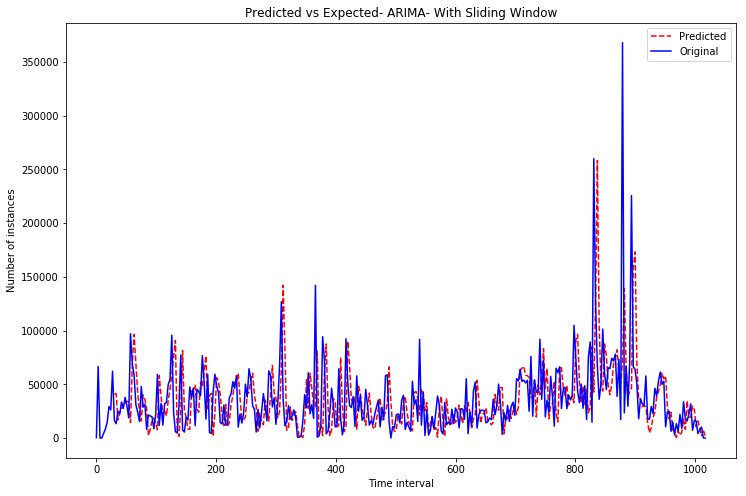

In [7]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Computational Time
import time
time_start = time.clock()
 
X = df2.no_of_instances
X = X.astype('float32')
window=10
Begin=0
predictions = list()
times=list()
SE=0
sumAPE=0
#sumMASE=0
for i in range (Begin,((len(X))-window)):
    train=X[i:i+window]
    test=X[i+window]        
    #size = int(len(X) * 0.50)
    #print('Size=',size)
    #train, test = X[50:size], X[size:180]
    #print(len(train))
    #print(len(test))
    history = [x for x in train]
    #print('History \n', history)
    #print('Train \n', train)
    #print('Test \n', test)
    #for t in range(len(test)):
    #SE=0
    #sumAPE=0
    #sumMASE=0
    #for t in range (i+window,i+window+1):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    #print('OUTPUT= \n', output)
    if (math.isnan(output[0])):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat = np.int(output[0])
    if (yhat<0):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat=yhat
    predictions.append(yhat)
    obs = test
    history.append(obs)
    #print('XYZ')
    t=i+window
    tm=df2.time_interval[t]
    times.append(tm)
    #print('time is ====', times)
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, test)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/((len(X))-window))
MAPE=(sumAPE/((len(X))-window))*100
#MASE=(sumMASE/(len(X)-window))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

#print('Time= \n', times)
#print('Prediction= \n', predictions)
# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- ARIMA- With Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()

